# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame({'age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [2]:
# Your code here.
import matplotlib.pyplot as plt
import numpy as np
colors = np.random.rand(10)
area = (30 * np.random.rand(10))**2  # 0 to 15 point radii
x = student_data.age
y = student_data.tardies
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here.
#The younger they are, the later they get to class. We can suposse that age has a strong influence in the time they are late.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
from scipy.stats import pearsonr
from scipy.stats import spearmanr
dof = len(student_data)-1
covariance = np.cov(x, y, ddof=dof)[0][1]
print('covariance: %.3f' % covariance)
corr1, _  = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr1)
corr2, _  = spearmanr(x, y)
print('Spearmans correlation: %.3f' % corr2)
#The dependency is inverse or negative, that is, the older they are (in age) the less late they are in class.
#In addition, the relationship between age and tardiness in class is very strong (|0.98|)
#Check this for more details about Pearson and Spearman: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

covariance: -410.100
Pearsons correlation: -0.939
Spearmans correlation: -0.985


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [32]:
# Your response here.
!pip install sklearn
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from scipy import stats

In [36]:
# Your response here. 
# The regression is lineal. The outcome variable is the tardies and the independent variable is the age.
X_AGE = student_data['age']
y_tardies = student_data['tardies']

slope, intercept, r_value, p_value, std_err = stats.linregress(X_AGE, y_tardies)

print(f'The slope is: {slope}')
print(f'The intercept is: {intercept}')
print(f'The coefficient of determination is: {r_value ** 2}')

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768
The coefficient of determination is: 0.8820265558250108


In [40]:
#Never train the model with the data you use for build the model, Cristina. 
#Use new data for train the model, but in these case I put the code just to remember hoe to do it.
#To trunc the data to train the model, we need to give the values.
X_AGE_values = student_data[['age']].values
y_tardies_values = student_data['tardies'].values

reg = LinearRegression().fit(X_AGE_values, y_tardies_values)

print(f'The slope is: {reg.coef_[0]}')
print(f'The intercept is: {reg.intercept_}')
print(f'The coefficient of determination is: {reg.score(X_AGE_values, y_tardies_values)}')
#Si hubiésemos entrenado el model con datos nuevos y no con los ya utlizados para construirlo, los valores del modelo podrían haber cambiado.

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768
The coefficient of determination is: 0.8820265558250109


Plot your regression model on your scatter plot.

In [41]:
import seaborn as sns

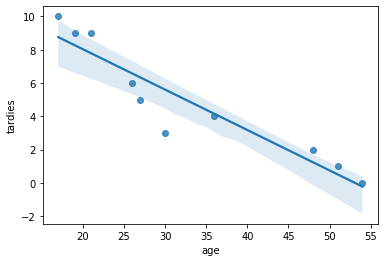

In [42]:
# Your code here.
sns.regplot(x="age", y="tardies", data=student_data);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [9]:
# Your response here. 
#Regardless of the student's age, the model determines that the student will be 12 minutes late. If we include age, that time decreases as age increases. 
#The coefficient of the model is 0.88 so it is a very good one!

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [43]:
# Import any libraries you may need & the data.
vehicles = pd.read_csv('vehicles.csv') 
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

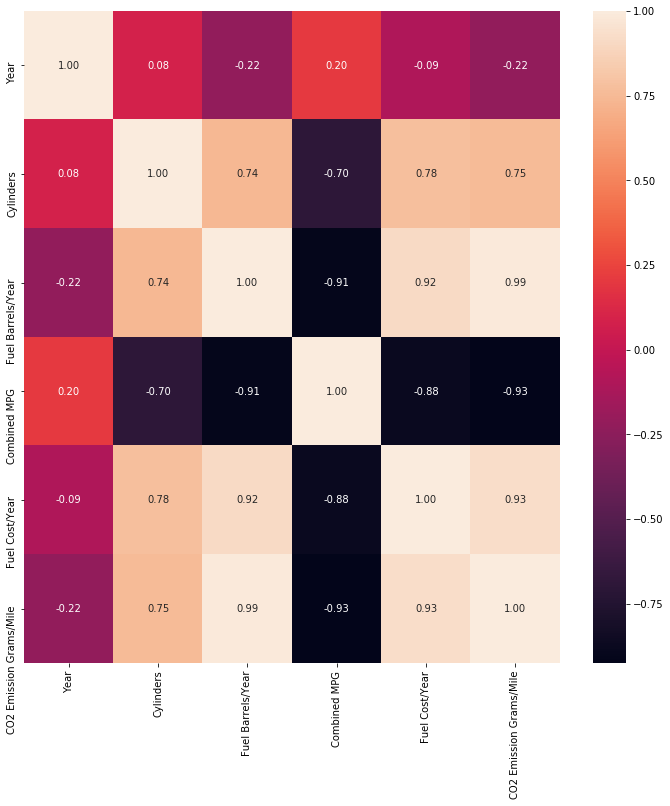

In [45]:
# Your response here. 
vehicles_selec= vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
#vehicles_selec.corr() #By default, use chi squared correlation
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
chi_squared = sns.heatmap(vehicles_selec.corr(), annot=True, fmt='.2f', ax=ax);
#If we use the Spearman correlation, we just need to put 'method='spearman' inside the parenthesis in vehicles_selec.corr()
#The most important variable is: 'Fuel Barrels/Year' beacuse the coef. is |1.00|. 
#Besides, all the variables selected are important to determinate the CO2 emissions except 'Year', because the coef. is low 0.22.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [62]:
from sklearn.linear_model import LinearRegression
X_VARIABLES = vehicles_selec[['Fuel Barrels/Year', 'Cylinders', 'Fuel Cost/Year', 'Combined MPG']]
y_co2 = vehicles_selec['CO2 Emission Grams/Mile']

reg2 = LinearRegression().fit(X_VARIABLES, y_co2)
#I'm using a linear regression trying to explain the CO2 Emissions by 'Fuel Barrels/Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG'.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [65]:
# Your response here. 
print(f'The slopes are: c1(Fuel Barrels/Year):{reg2.coef_[0]} c2(Cylinders):{reg2.coef_[1]} c3(Fuel Cost/Year):{reg2.coef_[2]} c4(Combined MPG):{reg2.coef_[3]}')
print(f'The intercept is: {reg2.intercept_}')
print(f'The coefficient of determination is: {reg2.score(X_VARIABLES, y_co2)}')
# The relation of 'Cylinders', 'Fuel Barrels/Year', 'Fuel Cost/Year' are positive. So the higher the values are, the higher the C02 emission value is.
#On the other hand, the 'Combined MPG' has a negative relation.
#The model is sooo good because the coefficient of determination is nearly1, 0.98.

The slopes are: c1(Fuel Barrels/Year):19.627133078480604 c2(Cylinders):1.044836333519283 c3(Fuel Cost/Year):0.029392997423483794 c4(Combined MPG):-3.1665885157450155
The intercept is: 131.1563247542121
The coefficient of determination is: 0.9802919387898396


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [72]:
# Your code here.
party_people = pd.DataFrame({'invited': [1, 3, 4, 6, 8, 9, 11, 14], 'attended': [1, 2, 4, 4, 5, 7, 8, 13]})
party_people

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

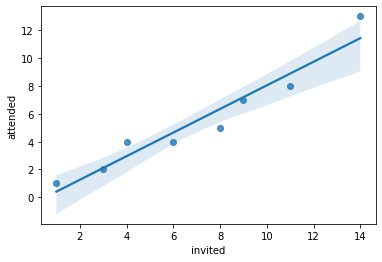

In [73]:
# Your code here.
sns.regplot(x="invited", y="attended", data=party_people);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [74]:
# Your response here. 
#I see, the more people you invite, the more they come... which seems logical.
X_INVITED = party_people[['invited']]
y_attended = party_people['attended']

reg3 = LinearRegression().fit(X_INVITED, y_attended)

print(f'The slopes is (la pendiente):{reg3.coef_[0]}')
print(f'The intercept is: {reg3.intercept_}')
print(f'The coefficient of determination is: {reg3.score(X_INVITED, y_attended)}')

The slopes is (la pendiente):0.8484848484848485
The intercept is: -0.43939393939393945
The coefficient of determination is: 0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

The slopes is (la pendiente):0.7149532710280373
The intercept is: -0.028037383177569097
The coefficient of determination is: 0.9723364485981308


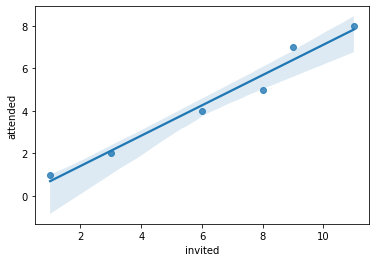

In [77]:
# Your response here. 
party_people2 = party_people.drop([2, 7])
sns.regplot(x="invited", y="attended", data=party_people2);
X_INVITED2 = party_people2[['invited']]
y_attended2 = party_people2['attended']

reg4 = LinearRegression().fit(X_INVITED2, y_attended2)

print(f'The slopes is (la pendiente):{reg4.coef_[0]}')
print(f'The intercept is: {reg4.intercept_}')
print(f'The coefficient of determination is: {reg4.score(X_INVITED2, y_attended2)}')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [18]:
# Your response here.
#The second model, without outliers seems better that the first one. The coefficient of determination is higher (0.97 vs 0.93).
#I suppose that in a case where the dataset used to build the model is greater than 8 observations it is correct to eliminate the values outside the interquartile range (outliers). 
#But in this case, even though the new model seems to gain in fit, having fewer observations does not make it better than the old one. In my opinion...